## Final Project Submission

Please fill out:
* Student name:  Weru Stanley Kinyua 
* Student pace: Part time 
* Scheduled project review date/time: 16/04/2023
* Instructor name: Noah Kandie
* Blog post URL:https://medium.com/@stanleykinyua35/microsoft-movies-studio-prospect-analysis-in-python-db3e528201bb


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create


In [101]:
# Importing relevant libraries.

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

We choose data on the gross sales,the budget, ratings and movie bascis. We are mostly interested in the column gross sales from data gross, the column budget from the data budget, average rating column from the ratings data and the runtime column from the move bascis data.These columns contain the data that we need to compute our analysis. 

Journey with me as we dive deeper into the analysis !!

In [5]:
# loading data on gross sales.
gross = pd.read_csv("data/bom.movie_gross.csv")


In [6]:
# loading data on movie budget.
budget = pd.read_csv("data/tn.movie_budgets.csv")

In [7]:
# loading data on movie ratings.

im_movies = sqlite3.connect("data/im.db")
ratings = pd.read_sql('SELECT * FROM movie_ratings', im_movies)

In [8]:
#loading data on movie bascics.

basics = pd.read_sql('SELECT * FROM movie_basics', im_movies)

#  Inspecting the data.
### 1. Inspecting gross

In [9]:
# Loading the first three rows
gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [10]:
# Loading the last three rows
gross.tail(3)

,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [11]:
# Checking a summary of data gross.
# We can see that three columns have missing data. We should have a total of 3387 enntries per column.
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
# Checking for the number of rows and columns
# Gross has 5 columns and 3387 rows.
gross.shape

(3387, 5)

In [13]:
#Checking for the number of duplicates in each column
#We see that there no dupilcated entries which means that each movie appears once.
gross.duplicated().sum()

0

In [14]:
# Checking for the number of null values per column.
# The column foreign_gross has close to has of its values as null values.
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

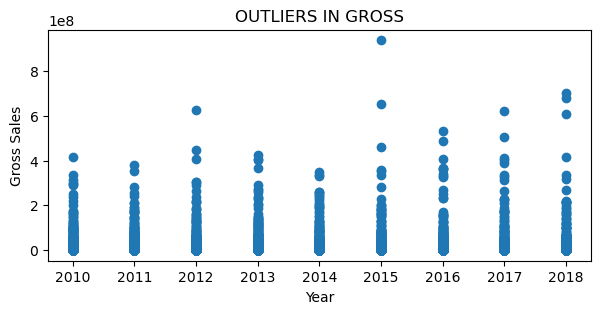

In [15]:
# Checking for outliers.
# In the year 2015,there is a movies which grossed way higher than other movies.

fig, ax = plt.subplots(figsize =(7, 3))

ax.scatter(gross["year"],gross["domestic_gross"])
ax.set_title('OUTLIERS IN GROSS')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Sales')

plt.show()

In [16]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
gross_copy = gross.copy()

### 2. Inspecting Budget

In [17]:
# Loading the first three rows
budget.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [18]:
# Loading the last three rows
budget.tail(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [19]:
# Checking for the number of rows and columns
# BUdget has 6 columns and 5782 rows.
budget.shape

(5782, 6)

In [20]:
# Checking a summary of data budget.
# We can see that are no missing values. We should have a total of 5782 enntries per column.
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
#Checking for the number of duplicates in each column
#We see that there no dupilcated entries which means that each movie appears once.
gross.duplicated().sum()

0

In [22]:
budget["production_budget"] = budget["production_budget"].str.replace("$", "").str.replace(",", "").astype(int)

budget['production_budget'].dtype

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7748\3617633862.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget["production_budget"] = budget["production_budget"].str.replace("$", "").str.replace(",", "").astype(int)


dtype('int32')

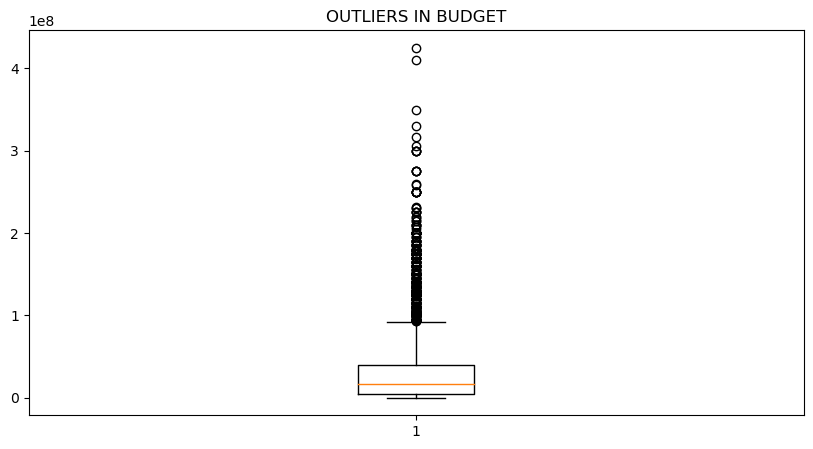

In [23]:
# Checking for outliers in budget.
# We see that there are two movies that have an extremely high budget compared to the rest.

fig, ax = plt.subplots(figsize =(10, 5))

ax.boxplot(budget["production_budget"])
ax.set_title('OUTLIERS IN BUDGET')

plt.show()

In [24]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
budget_copy = budget.copy()

### 3. Inspecting Ratings

In [25]:
# Loading the first three rows
ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [26]:
# Loading the last three rows
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [27]:
# Checking a summary of data ratings.
# We can see that are no missing values. We should have a total of 73856  enntries per column.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
# Checking for the number of rows and columns
# Gross has 3 columns and 73856 rows.
ratings.shape

(73856, 3)

In [29]:
#Checking for the number of duplicates in each column
#We see that there no dupilcated entries which means that each movie appears once.
ratings.duplicated().sum()

0

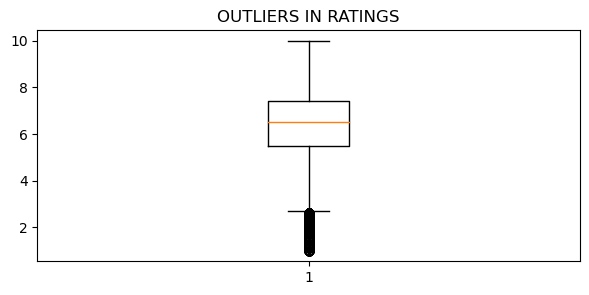

In [30]:
# Checking for outliers.
# We see in that we have a number of movies have very low rating.

fig, ax = plt.subplots(figsize =(7, 3))

ax.boxplot(ratings["averagerating"])
ax.set_title('OUTLIERS IN RATINGS')

plt.show()

In [31]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
ratings_copy = ratings.copy()

### 4. Inspecting Basics.

In [32]:
# Loading the first three rows
basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [33]:
# Loading the last three rows
basics.tail(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [34]:
# Checking for the number of rows and columns
# Basics has 6 columns and 146144 rows.

basics.shape

(146144, 6)

In [35]:
# Checking a summary of data basics.
# The column runtime_minutes has missing values. 
#We should have a total of 146144   enntries per column.

basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [36]:
#Checking for the number of duplicates in each column
#We see that there no dupilcated entries which means that each movie appears once.
basics.duplicated().sum()

0

In [37]:
# Checking for the number of null values per column.

basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

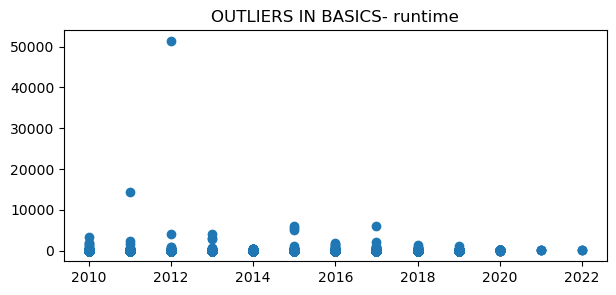

In [38]:
# Checking for outliers.
# We see in that there is a movie in 2012 with an usually long runtime.

fig, ax = plt.subplots(figsize =(7, 3))

ax.scatter(basics["start_year"],basics["runtime_minutes"])
ax.set_title('OUTLIERS IN BASICS- runtime')

plt.show()

In [39]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
ratings_copy = ratings.copy()

## Data Cleaning

#### Combining the data.

In [40]:
# Combining movie basics and movie ratings.
basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
JOIN movie_basics
USING (movie_id);
""",im_movies) 

In [41]:
#First three rows.
basics_and_ratings.head(3)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama


In [42]:
# Last three rows
basics_and_ratings.tail(3)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary
73855,tt9894098,6.3,128,Sathru,Sathru,2019,129.0,Thriller


In [43]:
#Summary of the combined datasets.
basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [44]:
# We have eight columns since dataframe basics has 6 and ratings has 3 columns but movie_id is common for both .
basics_and_ratings.shape

(73856, 8)

In [45]:
# Renaming the column primary_title to title in dataframe gross.
basics_and_ratings.rename(columns = {'primary_title':'title'}, inplace = True)

# Confirming that primary title has been renamed.
basics_and_ratings.head(1)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance


In [46]:
#Adding data from gross to basics and ratings.
basics_ratings_gross = basics_and_ratings.merge(gross_copy, on='title')

In [47]:
# Checking the first three elements.
basics_ratings_gross.head(3)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000,2014


In [48]:
# Checking the last three elements.
basics_ratings_gross.tail(3)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN,2015
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018
3026,tt7048622,7.7,11168,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",Cohen,1000000.0,NaN,2018


In [49]:
#To check the summary of the table
basics_ratings_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   title            3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [50]:
# To check the summary of the numeric columns
basics_ratings_gross.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,year
count,3027.000000,3.027000e+03,3027.000000,2980.000000,3.005000e+03,3027.000000
mean,6.457582,6.170030e+04,2013.783284,107.217114,3.064033e+07,2014.077635
std,1.012277,1.255132e+05,2.466955,20.073886,6.671629e+07,2.442245
min,1.600000,5.000000e+00,2010.000000,3.000000,1.000000e+02,2010.000000
25%,5.900000,2.117000e+03,2012.000000,94.000000,1.390000e+05,2012.000000
50%,6.600000,1.310900e+04,2014.000000,105.000000,2.000000e+06,2014.000000
75%,7.100000,6.276550e+04,2016.000000,118.000000,3.250000e+07,2016.000000
max,9.200000,1.841066e+06,2019.000000,272.000000,7.001000e+08,2018.000000


In [51]:
#Checking duplicated data
# There are no duplicates
basics_ratings_gross.duplicated().sum()

0

In [52]:
# Renaming the column primary_title to title
budget_copy.rename(columns = {'movie':'title'}, inplace = True)

#Confirming that renaming was accurate.
budget_copy.head(1)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"


In [120]:
# Adding the budget dataframe to basics_ratings_gross.
combined_movies_data = basics_ratings_gross.merge(budget_copy, on='title')

#The first three elements of combined_movies_data
combined_movies_data.head(3)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014,42,"Jan 10, 2014",70000000,"$18,848,538","$58,953,319"
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013,38,"Sep 27, 2013",8500000,"$21,569,509","$22,885,836"
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011,15,"Sep 23, 2011",50000000,"$75,605,492","$111,300,835"


In [55]:
#The last three elements of combined_movies_data
combined_movies_data.tail(3)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
1410,tt2592614,5.6,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.0,"Action,Horror,Sci-Fi",SGem,26800000.0,285400000,2017,84,"Jan 27, 2017",40000000,"$26,844,692","$314,101,190"
1411,tt2704998,7.0,163279,Game Night,Game Night,2018,100.0,"Action,Comedy,Crime",WB (NL),69200000.0,48500000,2018,94,"Feb 23, 2018",37000000,"$69,179,066","$117,378,084"
1412,tt2980210,6.1,36062,A Hologram for the King,A Hologram for the King,2016,98.0,"Comedy,Drama,Romance",RAtt.,4200000.0,NaN,2016,47,"Apr 22, 2016",35000000,"$4,212,494","$11,846,010"


In [56]:
#To check the summary of the table
combined_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1413 non-null   object 
 1   averagerating      1413 non-null   float64
 2   numvotes           1413 non-null   int64  
 3   title              1413 non-null   object 
 4   original_title     1413 non-null   object 
 5   start_year         1413 non-null   int64  
 6   runtime_minutes    1383 non-null   float64
 7   genres             1406 non-null   object 
 8   studio             1413 non-null   object 
 9   domestic_gross_x   1412 non-null   float64
 10  foreign_gross      1215 non-null   object 
 11  year               1413 non-null   int64  
 12  id                 1413 non-null   int64  
 13  release_date       1413 non-null   object 
 14  production_budget  1413 non-null   int32  
 15  domestic_gross_y   1413 non-null   object 
 16  worldwide_gross    1413 

In [57]:
#To check the number of rows and columns
combined_movies_data.shape

(1413, 17)

In [58]:
# To check the summary of the numeric columns in the combined data.
combined_movies_data.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross_x,year,id,production_budget
count,1413.000000,1.413000e+03,1413.000000,1383.000000,1.412000e+03,1413.000000,1413.000000,1.413000e+03
mean,6.434961,1.133554e+05,2013.644020,107.242950,6.034071e+07,2013.726115,51.659590,4.628144e+07
std,1.029822,1.640935e+05,2.531381,19.737869,8.443935e+07,2.530131,28.606088,5.517378e+07
min,1.600000,5.000000e+00,2010.000000,3.000000,8.000000e+02,2010.000000,1.000000,5.000000e+04
25%,5.900000,1.292600e+04,2011.000000,94.000000,7.175000e+06,2011.000000,27.000000,1.000000e+07
50%,6.500000,5.895500e+04,2014.000000,105.000000,3.365000e+07,2014.000000,52.000000,2.500000e+07
75%,7.100000,1.377340e+05,2016.000000,118.000000,7.422500e+07,2016.000000,76.000000,5.800000e+07
max,9.200000,1.841066e+06,2019.000000,192.000000,7.001000e+08,2018.000000,100.000000,4.106000e+08


#### Duplicated data in the combined data.

In [59]:
#Checking duplicated data
# no duplicates,combining the datasets automatically eliminated the duplicated data from the individual dataset inspection.
combined_movies_data.duplicated().sum()

0

#### Missing data.

In [60]:
# Defining a function to return percentage of missing values
def missing_values(data):
    #Identify the total missing values per column and sort
    miss = data.isna().sum().sort_values(ascending = False)
    
    #Calculating percentage of missing values and sorting
    percent_miss = (data.isna().sum()/len(data)).sort_values(ascending = False)
    
    #Store in dataframe
    missing = pd.DataFrame({'Missing values':miss, 'Percentage %':percent_miss*100})
    
    return missing

missing_vals = missing_values(combined_movies_data)
missing_vals

,Missing values,Percentage %
foreign_gross,198,14.012739
runtime_minutes,30,2.123142
genres,7,0.495400
domestic_gross_x,1,0.070771
movie_id,0,0.000000
domestic_gross_y,0,0.000000
production_budget,0,0.000000
release_date,0,0.000000
id,0,0.000000
year,0,0.000000


In [61]:
#Dropping the column foreign_gross 14% missing values with no criteria of filling dropping the rows will reduce my dataset.
#We will use the worldwide gross for our analysis.

combined_movies_data = combined_movies_data.drop('foreign_gross', axis = 'columns')

In [62]:
#confirming the column drop
combined_movies_data.columns

Index(['movie_id', 'averagerating', 'numvotes', 'title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'studio', 'domestic_gross_x',
       'year', 'id', 'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross'],
      dtype='object')

In [63]:
# Dropping rows in domestic gross and genre (a total of 8 rows).
combined_movies_data = combined_movies_data.dropna(subset=['genres','domestic_gross_x'])


In [64]:
# Confirming missing values have been dropped
missing_vals = missing_values(combined_movies_data)
missing_vals

,Missing values,Percentage %
runtime_minutes,27,1.921708
movie_id,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000
title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
genres,0,0.000000
studio,0,0.000000
domestic_gross_x,0,0.000000


<AxesSubplot:ylabel='Density'>

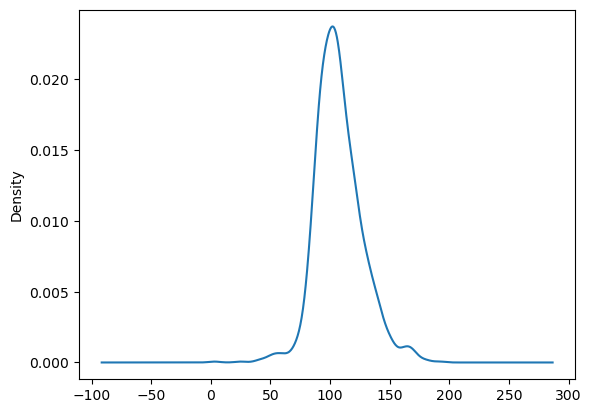

In [65]:
# Distribution of runtime 
combined_movies_data['runtime_minutes'].plot(kind='kde')

#Data peaks in the middle.We replace the missing values using the mean.

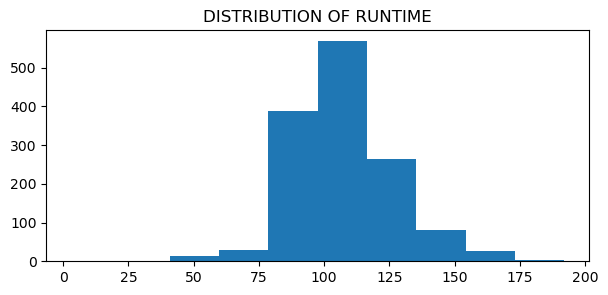

In [66]:
#PLotting a histogram to observe the frequency and disrubution of run time minutes.
fig, ax = plt.subplots(figsize =(7, 3))

ax.hist(combined_movies_data['runtime_minutes'])
ax.set_title('DISTRIBUTION OF RUNTIME')

plt.show()

In [67]:
#Getting the mean.

runtime_mins_mean = combined_movies_data['runtime_minutes'].mean()
runtime_mins_mean

107.30188679245283

In [68]:
#Replacing the missing value in with the mean.
combined_movies_data['runtime_minutes'].fillna(value=runtime_mins_mean, inplace=True)

#Confirming that all the missing data has been dropped and replaced.
missing_vals = missing_values(combined_movies_data)
missing_vals

,Missing values,Percentage %
movie_id,0,0.0
averagerating,0,0.0
numvotes,0,0.0
title,0,0.0
original_title,0,0.0
start_year,0,0.0
runtime_minutes,0,0.0
genres,0,0.0
studio,0,0.0
domestic_gross_x,0,0.0


### Inspecting Outliers
There are outliers in columns domestic gross, production budget, average ratings and runtime.
The next few cells capture an inspection of those outliers before proceeding to analyse the data.

#### 1. Outliers in gross.

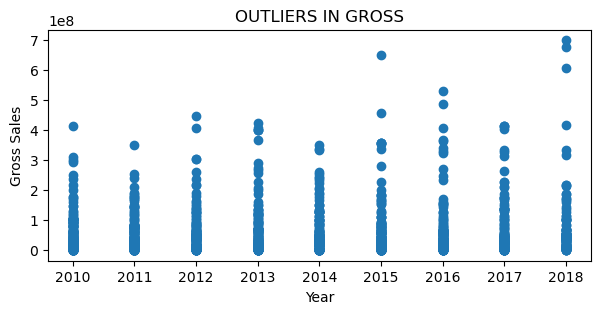

In [69]:
fig, ax = plt.subplots(figsize =(7, 3))

ax.scatter(combined_movies_data["year"],combined_movies_data["domestic_gross_x"])
ax.set_title('OUTLIERS IN GROSS')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Sales')

plt.show()

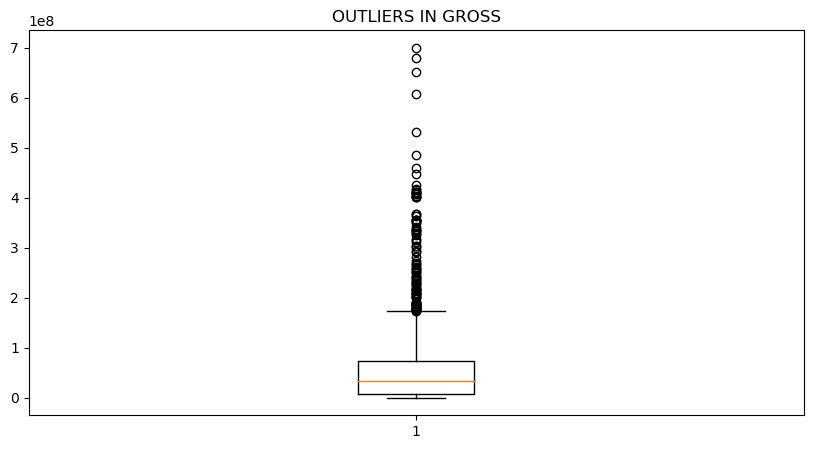

'\nThe outliers should be kept since the parity in gross sales could be due to a\ndifference in the number of times a movies has been watched.For this reason, \nhaving some movies gross way higher than others, does not present an anomally for which the points should be removed.\n\n'

In [70]:
fig, ax = plt.subplots(figsize =(10, 5))

ax.boxplot(combined_movies_data["domestic_gross_x"])
ax.set_title('OUTLIERS IN GROSS')

plt.show()

"""
The outliers should be kept since the parity in gross sales could be due to a
difference in the number of times a movies has been watched.For this reason, 
having some movies gross way higher than others, does not present an anomally for which the points should be removed.

"""

#### 2. Outliers in Ratings.

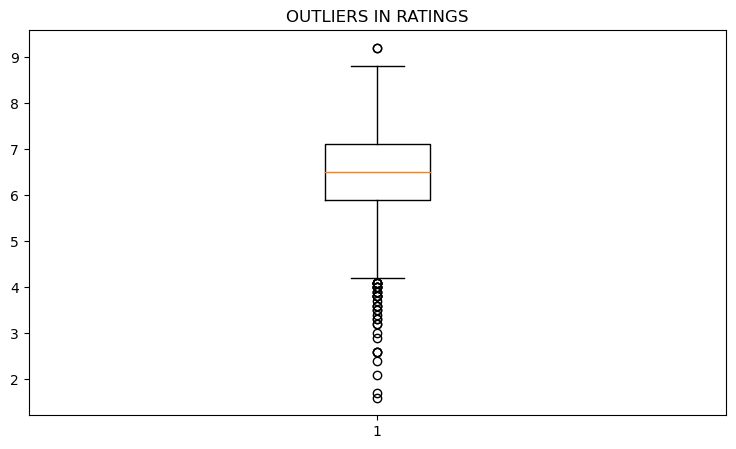

'\nMany movies have low ratings (below 4) since many points are plotted below the first quartile. There is a movie with an exceptionally high rating. Since  ratings are subjective and highly influenced by the \nviewers opinion, I decide to retain the outliers within ratings.\n\n'

In [71]:
# Checking for outliers.
# We see in that we have a number of movies have very low rating.

fig, ax = plt.subplots(figsize =(9, 5))

ax.boxplot(combined_movies_data["averagerating"])
ax.set_title('OUTLIERS IN RATINGS')

plt.show()

"""
Many movies have low ratings (below 4) since many points are plotted below the first quartile. There is a movie with an exceptionally high rating. Since  ratings are subjective and highly influenced by the 
viewers opinion, I decide to retain the outliers within ratings.

"""

#### 3. Outliers in Runtime.

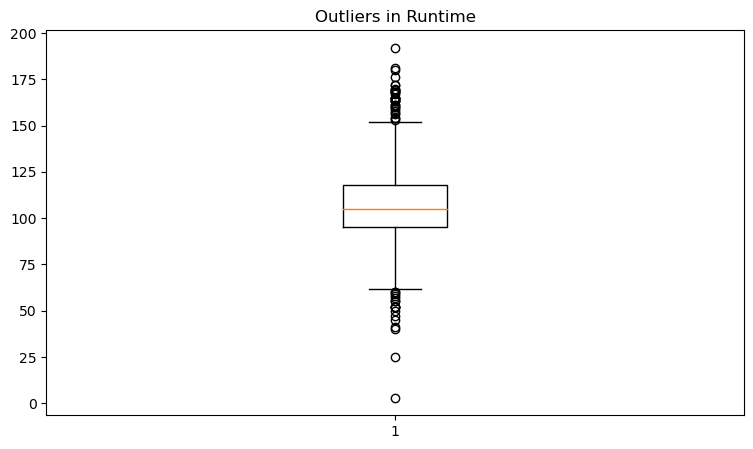

'\nOutliers to be retained since runtime is greatly influenced by the length of the movie script. \n\n'

In [72]:
fig, ax = plt.subplots(figsize =(9, 5))

ax.boxplot(combined_movies_data["runtime_minutes"])
ax.set_title('Outliers in Runtime')

plt.show()

"""
Outliers to be retained since runtime is greatly influenced by the length of the movie script. 

"""

#### 4. Outliers in Budget.


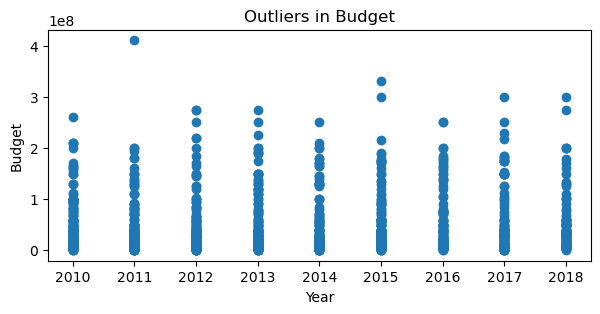

'\nIn 2011 and 2015, there are movies with a very high buddhet compared to the rest of the values. The same effect is captured in the plot for outliers in gross sales.\nI retain the outliers in the budget. Budgets vary depending on the length of the script and type of movie.Also, blockbusters tend to have higher marketing budgets than independet movies which could also be a leading reason in varying budgets. \n'

In [73]:
fig, ax = plt.subplots(figsize =(7, 3))

ax.scatter(combined_movies_data["year"],combined_movies_data["production_budget"])
ax.set_title('Outliers in Budget')
ax.set_xlabel('Year')
ax.set_ylabel('Budget')

plt.show()

"""
In 2011 and 2015, there are movies with a very high buddhet compared to the rest of the values. The same effect is captured in the plot for outliers in gross sales.
I retain the outliers in the budget. Budgets vary depending on the length of the script and type of movie.Also, blockbusters tend to have higher marketing budgets than independet movies which could also be a leading reason in varying budgets. 
"""

# Feature Engineering 

### Modifying genre

In [74]:
# Converting year and start year to date instead of integer.
combined_movies_data.start_year = pd.to_datetime(combined_movies_data.start_year, format='%Y')
combined_movies_data.year = pd.to_datetime(combined_movies_data.year, format='%Y')

#Confirming the change.
combined_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1412
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1405 non-null   object        
 1   averagerating      1405 non-null   float64       
 2   numvotes           1405 non-null   int64         
 3   title              1405 non-null   object        
 4   original_title     1405 non-null   object        
 5   start_year         1405 non-null   datetime64[ns]
 6   runtime_minutes    1405 non-null   float64       
 7   genres             1405 non-null   object        
 8   studio             1405 non-null   object        
 9   domestic_gross_x   1405 non-null   float64       
 10  year               1405 non-null   datetime64[ns]
 11  id                 1405 non-null   int64         
 12  release_date       1405 non-null   object        
 13  production_budget  1405 non-null   int32         
 14  domestic

In [75]:
combined_movies_data_copy = combined_movies_data.copy()

In [76]:
#seperating the genres and creating columns on each with a count 1 if listed on that entry and 0 if not listed.
s = combined_movies_data_copy['genres'].str.split(',').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(s.values[:, None])
genres_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int',) \
                .groupby(s.index) \
                .sum()

In [77]:
genres_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Combining the columns created with the combined movie data dataframe.
combined_movies_data_copy = pd.concat([combined_movies_data, genres_df], axis=1)


In [79]:
# Converting worldwide gross to an integer.  

combined_movies_data_copy['worldwide_gross'] = combined_movies_data_copy['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7748\415835868.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_movies_data_copy['worldwide_gross'] = combined_movies_data_copy['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)


In [80]:
#There are 22 more added columns which indicate there are 22 individual genres
combined_movies_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1412
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1405 non-null   object        
 1   averagerating      1405 non-null   float64       
 2   numvotes           1405 non-null   int64         
 3   title              1405 non-null   object        
 4   original_title     1405 non-null   object        
 5   start_year         1405 non-null   datetime64[ns]
 6   runtime_minutes    1405 non-null   float64       
 7   genres             1405 non-null   object        
 8   studio             1405 non-null   object        
 9   domestic_gross_x   1405 non-null   float64       
 10  year               1405 non-null   datetime64[ns]
 11  id                 1405 non-null   int64         
 12  release_date       1405 non-null   object        
 13  production_budget  1405 non-null   int32         
 14  domestic

In [81]:
#Claculating profir on the assumption that the budget is equivalent to the total cost of prudction
combined_movies_data_copy.loc[:,'Profit'] = combined_movies_data_copy['worldwide_gross'] - combined_movies_data_copy['production_budget']

In [82]:
combined_movies_data_copy.head(1)

,movie_id,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross_x,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014-01-01,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,...,0,0,0,0,0,0,0,0,0,-11046681


In [83]:
type(combined_movies_data_copy)

pandas.core.frame.DataFrame

# Analysis

Questions to answer are:

1. Which is the best rated genre; most profitable genre, genre with highest ratings?
2. What is the correlation between runtime and ratings?
3. What is the correlation between runtime and budget?
4. Which are the studios with the most productions ?

In [84]:
# Saving the cleaned data into a csv file
combined_movies_data_copy.to_csv('combined_movies_data_copy.csv',index=False)

In [85]:
# Veryfing storage of data by reading the file
combined_movies_data_csv = pd.read_csv('combined_movies_data.csv')

## Genres

In this part I check for the ranking of genres in relation to profit, budget and ratings. 

In [86]:
#Checking for the most produced genre. 

Genres_sorted_frequency = genres_df.sum().sort_values(ascending=False)
Genres_sorted_frequency

Drama          729
Comedy         450
Action         384
Adventure      303
Thriller       240
Crime          205
Romance        179
Horror         148
Biography      125
Mystery        111
Sci-Fi         111
Fantasy        102
Animation       90
Family          76
Documentary     49
History         45
Music           40
Sport           30
War             13
Western          8
Musical          6
News             2
dtype: int64

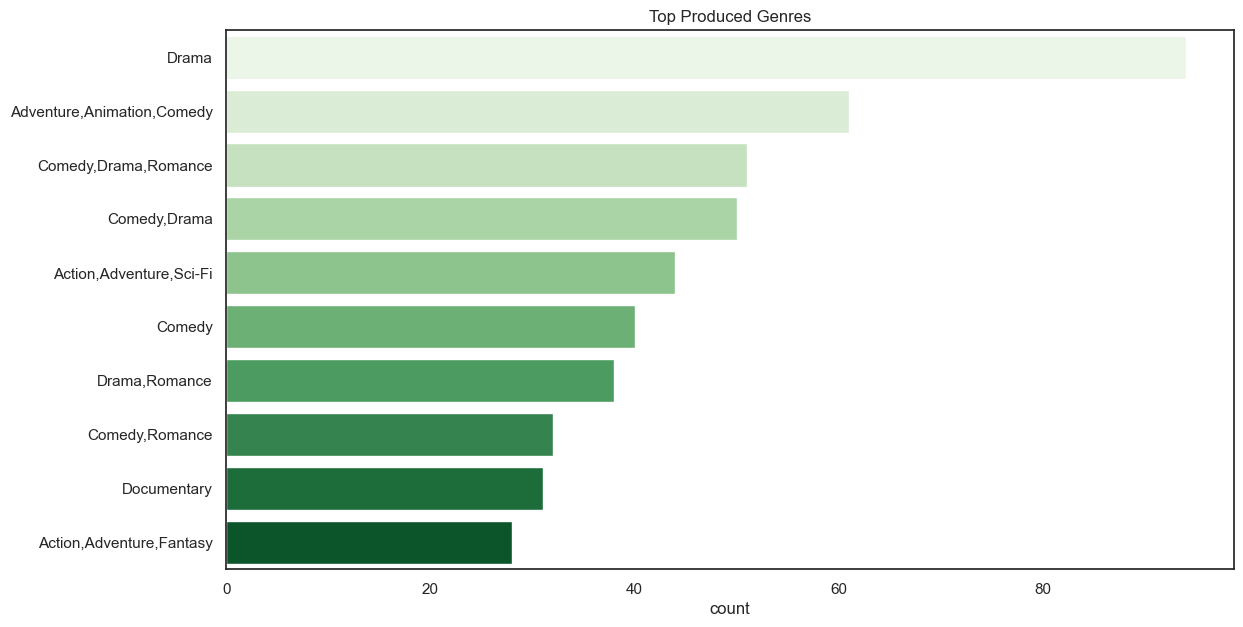

In [178]:
#Plotting the top produced genres from the dataframe based on the title of the movie,ordering and limiting to top10
Genres_plot = combined_movies_data_copy[combined_movies_data_copy.genres != 'Notlisted'].set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top Produced Genres')
sns.countplot(y = Genres_plot, order=Genres_plot.value_counts().index[:10], palette='Greens')
plt.show()


> The plot shows the most produced genres. A quick scan shows us that drama is the most featured genres.

#### Genres and Profit

In [223]:
# sort the combined_movies_data_copy by Profit in descending order
sorted_by_profit= combined_movies_data_copy.sort_values(by='Profit', ascending=False)

# extract the Genres column based on the order of the sorted Profit column
top_genres_by_profit = sorted_by_profit['genres']


In [234]:
#Most profitable genres.
top_genres_by_profit_table = sorted_by_profit.loc[:,['genres','Profit']]
top_genres_by_profit_table.head(20)

,genres,Profit
1395,"Action,Adventure,Sci-Fi",1748134200
270,"Action,Adventure,Sci-Fi",1433854864
444,"Action,Crime,Thriller",1328722794
331,"Action,Adventure,Sci-Fi",1148258224
301,"Action,Adventure,Sci-Fi",1135772799
516,"Adventure,Animation,Comedy",1122469910
515,"Fantasy,Romance",1122469910
514,"Adventure,Drama,Sport",1122469910
947,"Adventure,Animation,Comedy",1086336173
1316,"Action,Adventure,Sci-Fi",1072413963


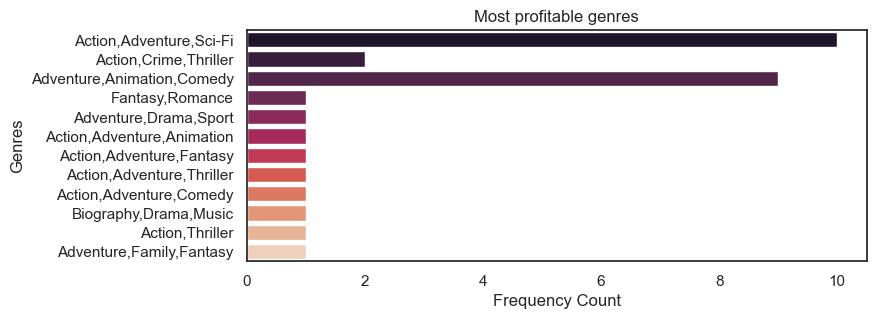

In [180]:
# create a horizontal bar plot of the genre frequencies with higher resolution
sns.set(rc={'figure.figsize':(8,3)}, style='white')
sns.countplot(y=top_genres_by_profit.iloc[:30], palette='rocket')

# set the x-axis label
plt.xlabel('Frequency Count')

# set the y-axis label
plt.ylabel('Genres')

# set the title of the plot
plt.title('Most profitable genres')

# increase the resolution of the plot
plt.savefig('genre_frequencies.png', dpi=300)

# display the plot
plt.show()

> Action,adventure, Sci-Fi is the genre combination that is most profitable, followed by comedy and animation. 

#### Genres and Budget

In [214]:
# sort the combined_movies_data_copy by budget in descending order
sorted_by_budget= combined_movies_data_copy.sort_values(by='production_budget', ascending=False)

# extract the Genres column based on the order of the sorted Profit column
top_genres_by_budget = sorted_by_budget['genres']


###### Most costly movie to produce.

In [221]:
#Getting the most costly genre to produce
top_genres_by_budget_table = sorted_by_budget.loc[:,['genres','production_budget']]
top_genres_by_budget_table.head()

,genres,production_budget
85,"Action,Adventure,Fantasy",410600000
1316,"Action,Adventure,Sci-Fi",330600000
877,"Action,Adventure,Fantasy",300000000
1079,"Action,Adventure,Thriller",300000000
1395,"Action,Adventure,Sci-Fi",300000000


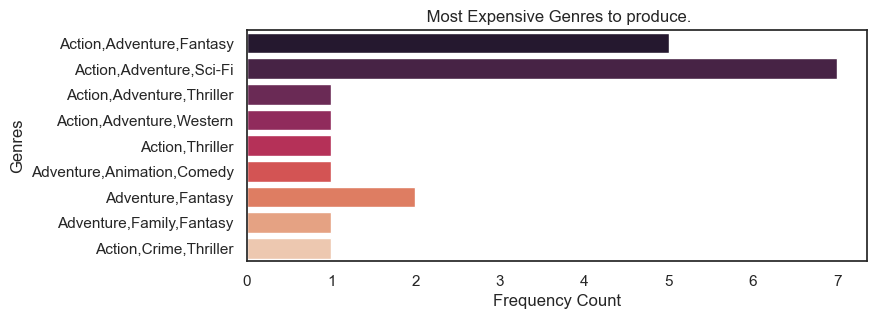

In [189]:
# create a horizontal bar plot of the genre frequencies with higher resolution
sns.set(rc={'figure.figsize':(8,3)}, style='white')
sns.countplot(y=top_genres_by_budget.head(20), palette='rocket')

# set the x-axis label
plt.xlabel('Frequency Count')

# set the y-axis label
plt.ylabel('Genres')

# set the title of the plot
plt.title(' Most Expensive Genres to produce.')

# increase the resolution of the plot
plt.savefig('genre_frequencies.png', dpi=300)

# display the plot
plt.show()

> Action adventure movies are the most expensive to produce.


###### Cheaest Movie to produce

In [222]:
#Generate the tail of the gener
top_genres_by_budget_table.tail()

,genres,production_budget
715,"Drama,Mystery,Sci-Fi",135000
258,"Comedy,Drama",120000
1077,"Horror,Mystery,Thriller",100000
782,"Drama,Fantasy,Romance",100000
95,"Comedy,Drama,Romance",50000


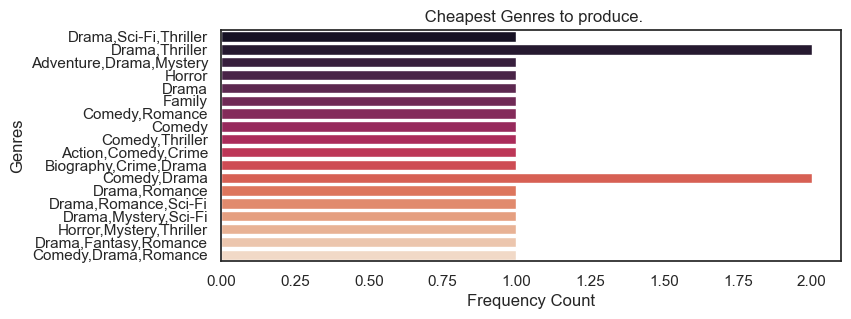

In [197]:
# create a horizontal bar plot of the genre frequencies with higher resolution
sns.set(rc={'figure.figsize':(8,3)}, style='white')
sns.countplot(y=top_genres_by_budget.tail(20), palette='rocket')

# set the x-axis label
plt.xlabel('Frequency Count')

# set the y-axis label
plt.ylabel('Genres')

# set the title of the plot
plt.title(' Cheapest Genres to produce.')

# increase the resolution of the plot
plt.savefig('genre_frequencies.png', dpi=300)

# display the plot
plt.show()

> Drama, comedy and thriller movies are the cheapest to produce. 

#### Genres and ratings 

In [200]:
# sort the combined_movies_data_copy by Ratings in descending order
sorted_by_ratings= combined_movies_data_copy.sort_values(by='averagerating', ascending=False)

# extract the Genres column based on the order of the sorted Profit column
top_genres_by_ratings = sorted_by_ratings['genres']

top_genres_by_ratings.head(20).value_counts()

Drama                         4
Documentary                   2
Action,Adventure,Sci-Fi       2
Drama,Music                   2
Adventure                     1
Drama,History,War             1
Adventure,Drama,Sci-Fi        1
Documentary,Music             1
Comedy,Drama                  1
Action,Biography,Drama        1
Action,Thriller               1
Adventure,Animation,Comedy    1
Drama,Western                 1
Action,Sport                  1
Name: genres, dtype: int64

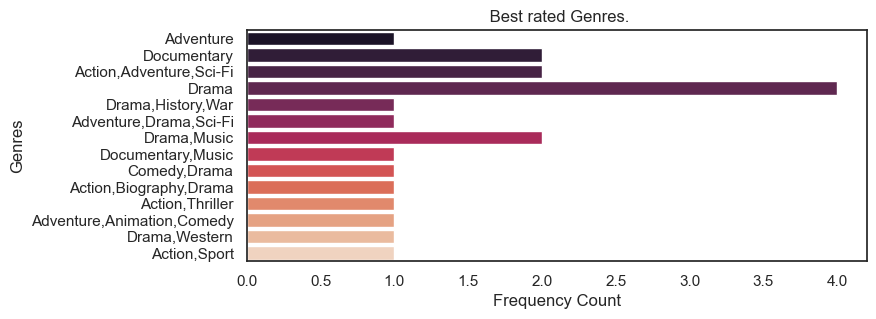

In [198]:
# create a horizontal bar plot of the genre frequencies with higher resolution
sns.set(rc={'figure.figsize':(8,3)}, style='white')
sns.countplot(y=top_genres_by_ratings.head(20), palette='rocket')

# set the x-axis label
plt.xlabel('Frequency Count')

# set the y-axis label
plt.ylabel('Genres')

# set the title of the plot
plt.title(' Best rated Genres.')

# increase the resolution of the plot
plt.savefig('genre_frequencies.png', dpi=300)

# display the plot
plt.show()

> Drama is the best rated movie and also cheapest to produce as seen earlier. Action adventure Sci-fi is among best rated movies and also most profitable as seen earlier. 

#### Genre and Runtime 

In [232]:
# sort the combined_movies_data_copy by budget in descending order
sorted_by_runtime= combined_movies_data_copy.sort_values(by='runtime_minutes', ascending=False)

# extract the Genres column based on the order of the sorted Profit column
top_genres_by_runtime = sorted_by_runtime.loc[:, ['genres', 'runtime_minutes']]
top_genres_by_runtime.head(25)

,genres,runtime_minutes
842,"Drama,History,War",192.0
873,Documentary,181.0
915,"Biography,Crime,Drama",180.0
1195,"Drama,Romance",176.0
961,"Action,Thriller",172.0
657,"Action,Drama,Mystery",172.0
1048,"Action,Drama,Sport",170.0
886,"Comedy,Drama",169.0
116,"Adventure,Family,Fantasy",169.0
652,"Adventure,Drama,Sci-Fi",169.0


> A quick scan at the top 15 movies with the highest run time shows that action drama has multiple instances of high runtimes.
Action,Adventure,Sci-Fi which is the most profitable appears only once among the top 15 longest movies.

### Studios

In [243]:
#counting the occurence of each studio mention in the dataframe
combined_movies_data_copy.studio.value_counts()

#creating a dictonary to hold the count values
studio_occurrences = combined_movies_data_copy['studio'].value_counts().to_dict()


[Text(0.5, 0, 'Occurrences'),
 Text(0, 0.5, 'Studio'),
 Text(0.5, 1.0, 'Top 5 Studio Occurrences')]

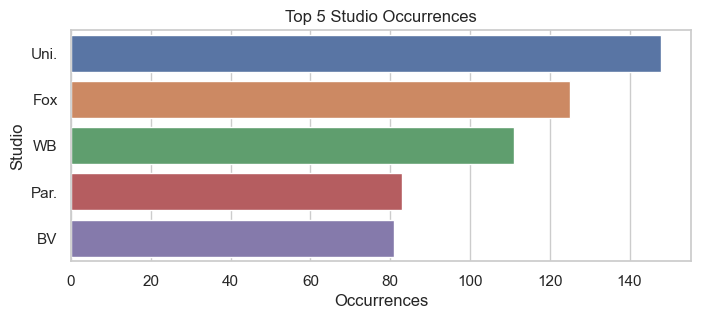

In [244]:
# convert the dictionary into a pandas dataframe
studio_occurrences = pd.DataFrame.from_dict(studio_occurrences, orient='index', columns=['Occurrences'])

# sort the dataframe in descending order by 'Occurrences' column and slice the top 100
top_studios = studio_occurrences.sort_values(by='Occurrences', ascending=False).iloc[:5]

# create a horizontal bar plot using seaborn
sns.set(style='whitegrid')
ax = sns.barplot(x='Occurrences', y=top_studios.index, data=top_studios)
ax.set(xlabel='Occurrences', ylabel='Studio', title='Top 5 Studio Occurrences')


> Universal studios and Fox studios have produced the most movies.

## Checking Correlations

### Correlation between runtime and ratings.

In [98]:
# correlation between Rating and runtime.
cor1 =combined_movies_data_copy[["runtime_minutes","averagerating"]].corr(method ='pearson')
print (cor1)

                 runtime_minutes  averagerating
runtime_minutes         1.000000       0.301153
averagerating           0.301153       1.000000


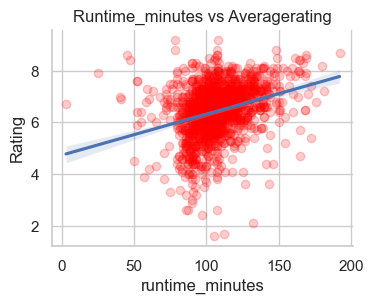

In [247]:
# Plot scatterplot of Runtime_minutes vs Averagerating
sns.lmplot(x="runtime_minutes", 
           y="averagerating", 
           data= combined_movies_data_copy,
           height = 3,
           aspect=1.3,
           scatter_kws={'alpha':1/5, 'color':'red'},
           palette='Reds')
plt.title('Runtime_minutes vs Averagerating')
plt.xlabel('runtime_minutes')
plt.ylabel('Rating');

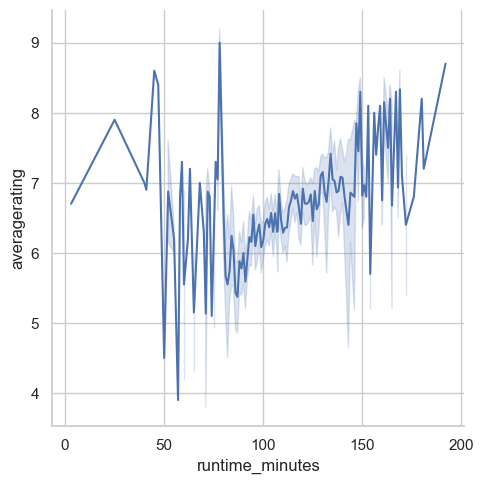

In [99]:
sns.relplot(data= combined_movies_data_copy, x="runtime_minutes", y="averagerating", kind="line")

>There is weak positive correlation between ratings and runtime. Movies with higher runtimes tend to have higher ratings.The clustered nature of the plot indicates that could be a non-linear relationship between rating and data. 


#### Correlation between runtime and budget.

In [108]:
# Correlation between runtime and budget
cor_runtime_budget =combined_movies_data_copy[["production_budget","runtime_minutes"]].corr(method ='pearson')
print (cor_runtime_budget)

                   production_budget  runtime_minutes
production_budget           1.000000         0.264242
runtime_minutes             0.264242         1.000000


<AxesSubplot:>

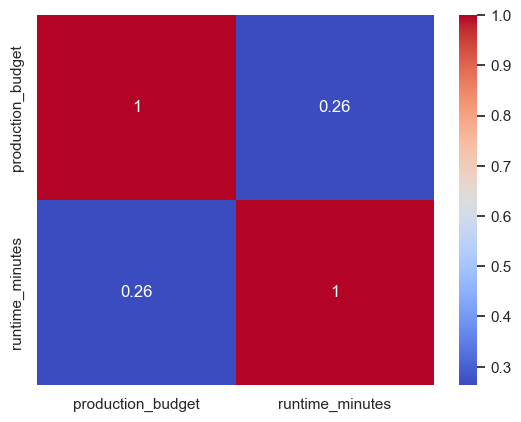

In [109]:
# Calculate the correlation matrix
vars_of_interest = ['production_budget', 'runtime_minutes']
subset_df = combined_movies_data_copy[vars_of_interest]
corr_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

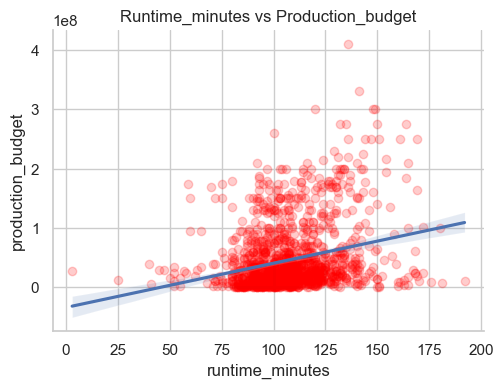

In [246]:
# Plot scatterplot of Runtime_minutes vs Averagerating
sns.lmplot(x="runtime_minutes", 
           y="production_budget", 
           data= combined_movies_data_copy,
           height = 4,
           aspect=1.3,
           scatter_kws={'alpha':1/5, 'color':'red'},
           palette='Reds')
plt.title('Runtime_minutes vs Production_budget')
plt.xlabel('runtime_minutes')
plt.ylabel('production_budget');

>There is a weak positive correlation between budget and runtime. This implies that that as runtime increaes, the budget increases.

#### Correlation between ratings and worldwide gross sales

In [117]:
cor_ratings_gross =combined_movies_data_copy[["averagerating","worldwide_gross"]].corr(method ='pearson')
print (cor_ratings_gross)

                 averagerating  worldwide_gross
averagerating         1.000000         0.190962
worldwide_gross       0.190962         1.000000


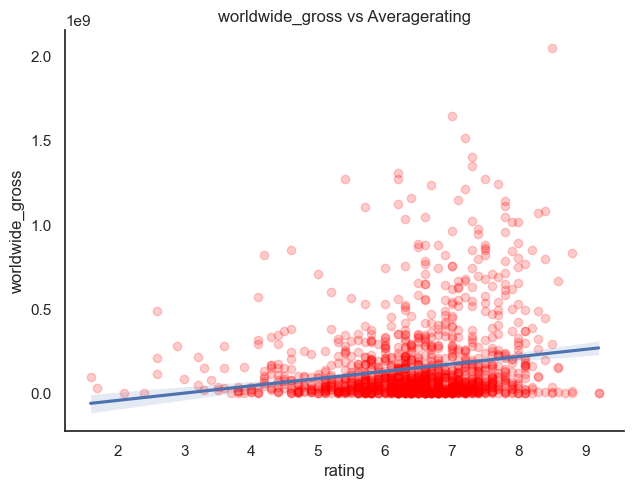

In [202]:
# Plot scatterplot of worldwide_gross vs Averagerating
sns.lmplot(x="averagerating", 
           y="worldwide_gross", 
           data= combined_movies_data_copy,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5, 'color':'red'},
           palette='Greens')
plt.title('worldwide_gross vs Averagerating')
plt.xlabel('rating')
plt.ylabel('worldwide_gross');

> There is a positive correlation between ratings and gross sales. This implies that as ratings increase, the more likely a movie is to make more sales. 

## Conclusion

From the analysis, the a number of conclusions can be made based on the leading questions.

Which is the best rated genre; most profitable genre, genre with highest ratings?

- The best rated genre is Drama and Action,Adventure,Sci-Fi.
- The most profitable genre is Action,Adventure,Sci-Fi

Which are the most expensive genres and cheapest genres to produce?

- The cateogory of action adventure movies are the most expensive to produce. Action,Adventure,Sci-Fi. being the most expensice action adventure movie to produce
- Drama, comedy and thriller movies are the cheapest to produce.

What is the correlation between runtime and ratings?

- There is weak positive correlation between ratings and runtime. 

What is the correlation between runtime and budget?
- There is weak positive correlation between budget and runtime. 

Which are the studios with the most productions ?
- Universal studios and Fox studios have produced the most movies.


## Recommendations.

Base on the business problem and the findings, I recommend that:

1.Microsoftstudios can choose to produce either Drama or Action,Adventure,Sci-Fi.

Microsoft studios can start by producing drama movies and variation like darma, comedy, animation since they are cheap to produce and relatively profitable compared to other genres and they have good ratings. After increasing viewership of their movies, Microsoft studios can proceed to produce Action,Adventure,Sci-Fi which is the most profitable but expensive to produce. 

2.Microsoft should commission another study to recommend the best distribution channel for its movies. We could not do this since the data was not available.

3.Later on Microsoft studios should consider a study on the market share and how acquiring smaller independent studios would help them grow their market share and viewership.